# Part 1

Part 1 requires the selection of three data files for analysis. I chose small networks: BOT_REQUESTS.csv; medium networks: ITEMS.csv; large networks: REQUEST_FOR_DELETION.csv

## Task A

Based on the small network BOT_REQUESTS.csv

In [2]:
import pandas as pd
import networkx as nx
from itertools import combinations

df = pd.read_csv('D://kcl/Network Data Analysis/assessment/datasets/BOT_REQUESTS.csv')
G = nx.Graph()

# Group by page name and thread subject
grouped = df.groupby(['page_name', 'thread_subject'])

# Build edges
for _, group in grouped:
    users = group['username'].unique()
    for user1, user2 in combinations(users, 2):
        if G.has_edge(user1, user2):
            G[user1][user2]['weight'] += 1
        else:
            G.add_edge(user1, user2, weight=1)

# Network statistics
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f'Average degree: {avg_degree:.2f}')

Number of nodes: 527
Number of edges: 2425
Average degree: 9.20


C:\Users\86180\AppData\Local\Temp\ipykernel_572\208316337.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


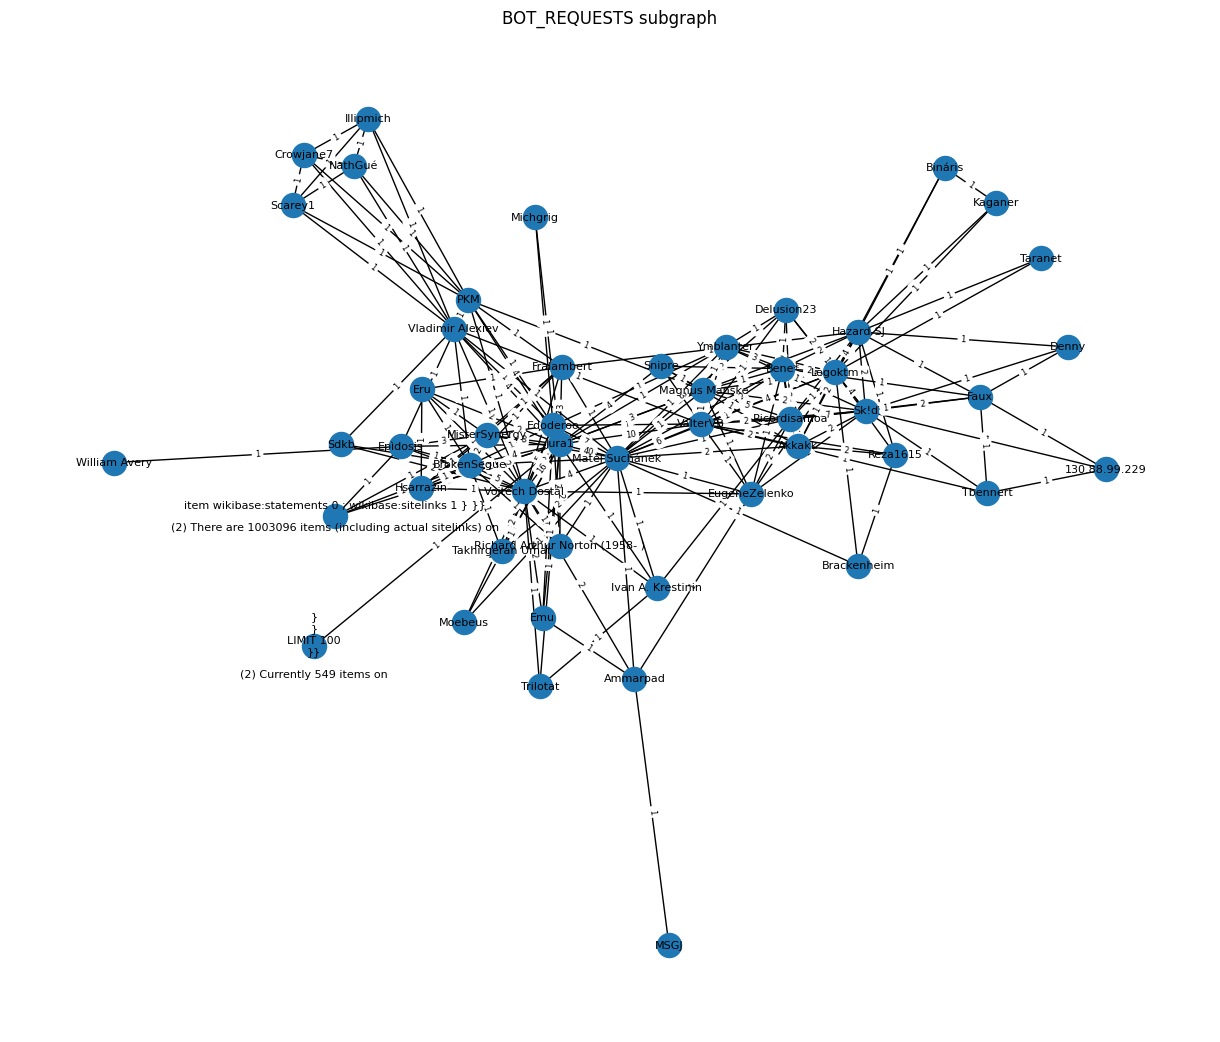

In [6]:
import matplotlib.pyplot as plt

# Visualize the first 50 nodes subgraph
sub_nodes = list(G.nodes())[:50]
G_sub = G.subgraph(sub_nodes)
pos = nx.spring_layout(G_sub, seed=42)

plt.figure(figsize=(12, 10))
nx.draw(G_sub, pos, with_labels=True, node_size=300, font_size=8)
nx.draw_networkx_edge_labels(G_sub, pos,
    edge_labels={(u, v): d['weight'] for u, v, d in G_sub.edges(data=True)},
    font_size=6)
plt.title('BOT_REQUESTS subgraph')
plt.axis('off')
plt.tight_layout()
plt.show()